## NetworkX로 네트워크 만들기
#### Amita Kapoor가 쓴 "Social Network Analysis in Python"을 참고했습니다.
#### https://www.datacamp.com/community/tutorials/social-network-analysis-python#comments

#### Symmetric Networks (대칭 네트워크)

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

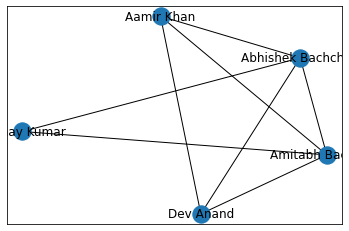

In [21]:
nx.draw_networkx(G_symmetric)

#### Asymmetric Networks (비대칭 네트워크)

In [50]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge("Dad", "Me")
G_asymmetric.add_edge("Dad", "Sister")
G_asymmetric.add_edge("GrandMa", "Dad")
G_asymmetric.add_edge("Sister", "Nephew")

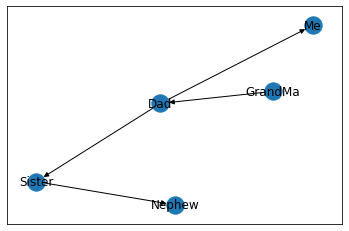

In [51]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

#### Weighted Networks

In [24]:
# edge의 가중치를 설정할 수 있다. 이 예제에서 weight가 25라는 것은 25번 같은 영화에 출연했다는 의미이다.

G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan', 'Abhishek Bachchan', weight = 25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

#### Multigraph

In [36]:
# Multigraph를 통해 노드 간의 관계에 여러 속성을 줄 수 있다.

G = nx.MultiGraph()
G.add_edge("A", "B", relation = 'neighbor')
G.add_edge("A", "B", relation = 'friend')
G.add_edge("B", "C", relation = 'neighbor')
G.add_edge("D", "C", relation = 'friend')

0

In [37]:
# 아래 함수를 통해 node간의 연결 상태를 확인할 수 있다.

G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D')])

#### Degree

In [25]:
# Degree
# node의 차수를 알 수 있다.

nx.degree(G_symmetric, "Dev Anand")

3

#### Clustering Coeffcient

In [26]:
# 군집화 계수의 평균은 0.86이다. 

nx.average_clustering(G_symmetric)

0.8666666666666666

#### Distance

In [27]:
nx.shortest_path(G_symmetric, "Dev Anand", "Akshay Kumar")

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [28]:
# bfs_tree 함수는 두번째 parameter 값에서 시작하는 모든 경로를 그려준다.

T = nx.bfs_tree(G_symmetric, "Dev Anand")

nx.draw_networkx(T)

#### Eccentricity

In [31]:
 # 노드로부터 가장 먼 노드까지의 길이

nx.eccentricity(G_symmetric)

{'Amitabh Bachchan': 1,
 'Abhishek Bachchan': 1,
 'Aamir Khan': 2,
 'Akshay Kumar': 2,
 'Dev Anand': 2}

## 네트워크 인플루언서

#### Degree Centrality (연결 중심성)

In [39]:
# 연결된 노드의 수 / 자신을 제외한 전체 노드의 수

nx.degree_centrality(G_symmetric)

{'Amitabh Bachchan': 1.0,
 'Abhishek Bachchan': 1.0,
 'Aamir Khan': 0.75,
 'Akshay Kumar': 0.5,
 'Dev Anand': 0.75}

#### Eigenvector Centrality (아이겐벡터 중심성)

In [40]:
# 중요한 친구가 많은지 확인한다.
# Google의 Pagerank가 Eigenvector Centrality를 사용하였다.

nx.eigenvector_centrality(G_symmetric)

{'Amitabh Bachchan': 0.5100364187624349,
 'Abhishek Bachchan': 0.5100364187624349,
 'Aamir Khan': 0.43904190094642953,
 'Akshay Kumar': 0.3069366734339046,
 'Dev Anand': 0.43904190094642953}

#### Betweenness Centrality (매개 중심성)

In [41]:
# 네트워크 안에서 얼마나 매개 역할을 하고 있는지 확인한다.

nx.betweenness_centrality(G_symmetric)

{'Amitabh Bachchan': 0.16666666666666666,
 'Abhishek Bachchan': 0.16666666666666666,
 'Aamir Khan': 0.0,
 'Akshay Kumar': 0.0,
 'Dev Anand': 0.0}

## 마무리: Facebook 

In [43]:
# 10명의 친구목록을 가지고 있는 데이터이다.
# API를 통해 나의 친구도 분석할 수 있을 거 같다.
# 우선 데이터를 불러온다.

G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [45]:
# 그래프의 정보를 가지고 온다.
# 평균적으로 43명의 친구를 가지고 있다는 것이 흥미롭다.

print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-1.0934655338525772,
 0.9627762109041214,
 -0.8240779161453247,
 1.015607190132141)

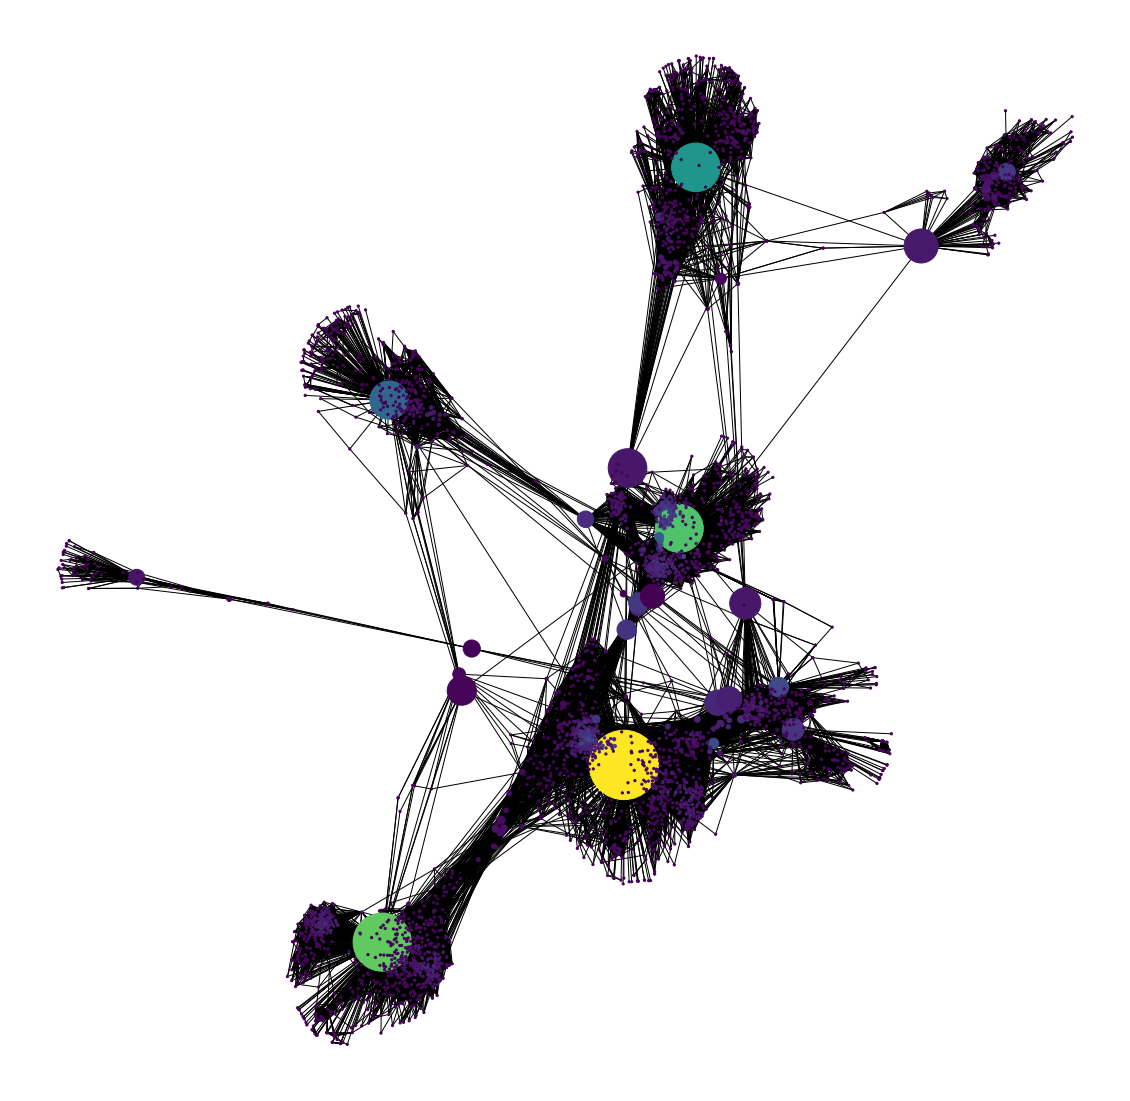

In [48]:
# 그래프를 그린다.
# 아래에서 보듯이 몇몇 인플루언서를 중심으로 클러스터링 되어 있는 것을 볼 수 있다.

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized = True, endpoints = True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize = (20, 20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                node_color=node_color,
                node_size=node_size)
plt.axis('off')

In [49]:
# 정렬을 통해 가장 연결중심성이 높은 다섯 가지 노드를 보여줄 수 있다. 

sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]